# EDA

By Ishan Sharma

Before I proceed with my full analysis, I shall engage in some EDA of my dataset

In [1]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

To peer into my dataset:

In [2]:
taxi_trip_df = pd.read_csv("../data/taxi_trip_pricing.csv")

In [3]:
taxi_trip_df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


There are clearly a great number of nulls, which I shall have to deal with.

In [4]:
taxi_trip_df.isna().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [5]:
(1-taxi_trip_df.isna()).sum()

Trip_Distance_km         950
Time_of_Day              950
Day_of_Week              950
Passenger_Count          950
Traffic_Conditions       950
Weather                  950
Base_Fare                950
Per_Km_Rate              950
Per_Minute_Rate          950
Trip_Duration_Minutes    950
Trip_Price               951
dtype: int64

Clearly, ```Trip_Distance_km``` is something which is right-skewed and contains a number of outliers. Thus, I shall have to use the median to fill numm values.

(array([299., 265., 258., 108.,   0.,   0.,   2.,   9.,   3.,   6.]),
 array([  1.23      ,  15.71370472,  30.19740943,  44.68111415,
         59.16481886,  73.64852358,  88.1322283 , 102.61593301,
        117.09963773, 131.58334244, 146.06704716]),
 <BarContainer object of 10 artists>)

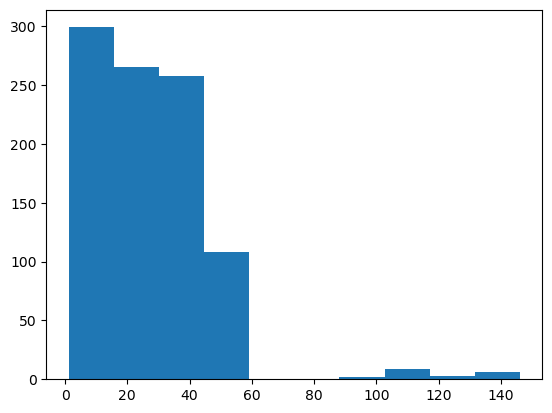

In [8]:
plt.hist(taxi_trip_df["Trip_Distance_km"])

With these categorical variables, I shall simply have to interpret the null values as none of the above

In [10]:
taxi_trip_df["Time_of_Day"].value_counts()

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

In [9]:
taxi_trip_df["Day_of_Week"].value_counts()

Day_of_Week
Weekday    655
Weekend    295
Name: count, dtype: int64

In [11]:
taxi_trip_df["Passenger_Count"].value_counts()

Passenger_Count
3.0    251
2.0    241
1.0    238
4.0    220
Name: count, dtype: int64

In [13]:
taxi_trip_df["Traffic_Conditions"].value_counts()

Traffic_Conditions
Low       397
Medium    371
High      182
Name: count, dtype: int64

In [14]:
taxi_trip_df["Weather"].value_counts()

Weather
Clear    667
Rain     227
Snow      56
Name: count, dtype: int64

```Base_Fare``` has a pretty flat distribution, so I can fill it with either the mean or median - they are practically the same.

(array([ 93., 109.,  90.,  79.,  98., 101.,  96.,  91.,  92., 101.]),
 array([2.01 , 2.309, 2.608, 2.907, 3.206, 3.505, 3.804, 4.103, 4.402,
        4.701, 5.   ]),
 <BarContainer object of 10 artists>)

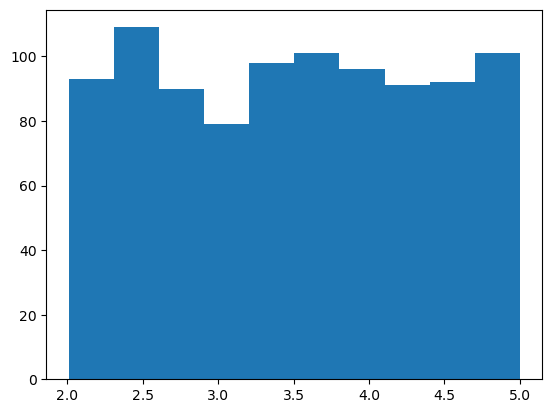

In [16]:
plt.hist(taxi_trip_df["Base_Fare"])

Likewise with ```Per_Km_Rate```.

(array([ 95.,  96., 105.,  92., 109.,  96.,  88.,  77.,  91., 101.]),
 array([0.5 , 0.65, 0.8 , 0.95, 1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.85, 2.  ]),
 <BarContainer object of 10 artists>)

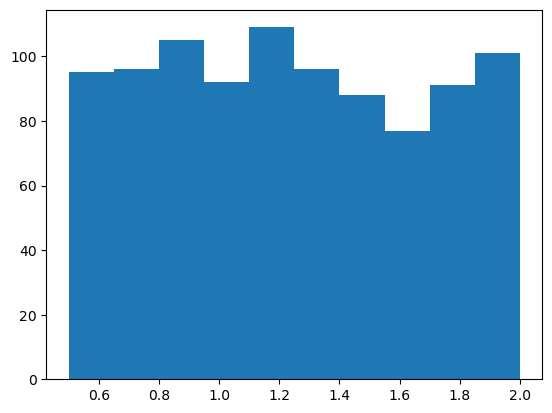

In [17]:
plt.hist(taxi_trip_df["Per_Km_Rate"])

And likewise with ```Per_Minute_Rate```.

(array([ 91., 102., 105.,  89., 121.,  70.,  91., 123.,  63.,  95.]),
 array([0.1 , 0.14, 0.18, 0.22, 0.26, 0.3 , 0.34, 0.38, 0.42, 0.46, 0.5 ]),
 <BarContainer object of 10 artists>)

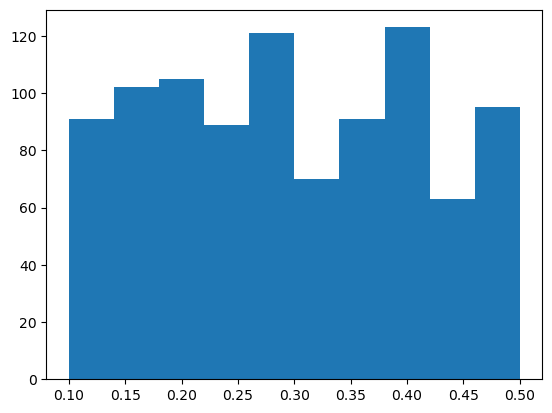

In [18]:
plt.hist(taxi_trip_df["Per_Minute_Rate"])

And likewise with ```Trip_Duration_Minutes```.

(array([ 89.,  83., 101.,  99., 111., 106.,  91.,  86.,  98.,  86.]),
 array([  5.01 ,  16.493,  27.976,  39.459,  50.942,  62.425,  73.908,
         85.391,  96.874, 108.357, 119.84 ]),
 <BarContainer object of 10 artists>)

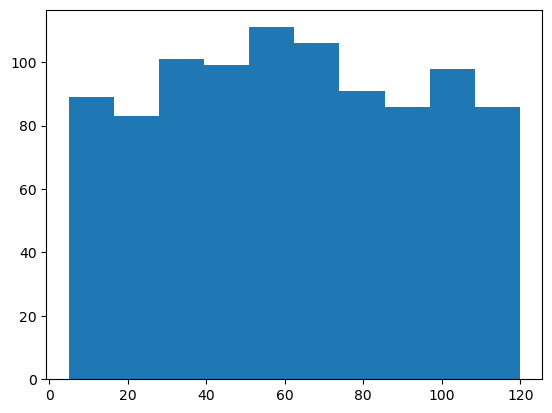

In [19]:
plt.hist(taxi_trip_df["Trip_Duration_Minutes"])

I shall have to deal with ```Trip_Price``` by dropping the nulls from the set, as it is my target variable. 

(array([301., 436., 170.,  23.,   1.,   0.,   5.,   3.,   5.,   7.]),
 array([  6.1269    ,  38.71857887,  71.31025774, 103.9019366 ,
        136.49361547, 169.08529434, 201.67697321, 234.26865207,
        266.86033094, 299.45200981, 332.04368868]),
 <BarContainer object of 10 artists>)

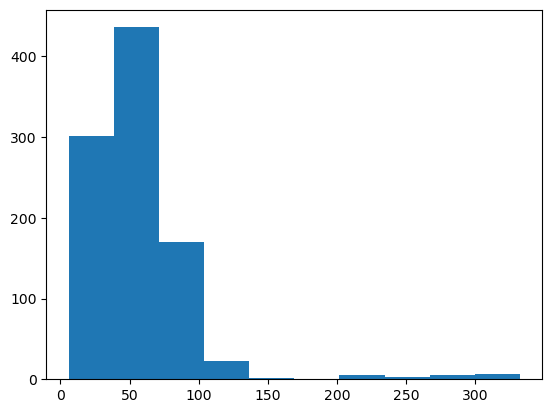

In [20]:
plt.hist(taxi_trip_df["Trip_Price"])